In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df = pd.read_csv('iris.data')

In [51]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

In [52]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


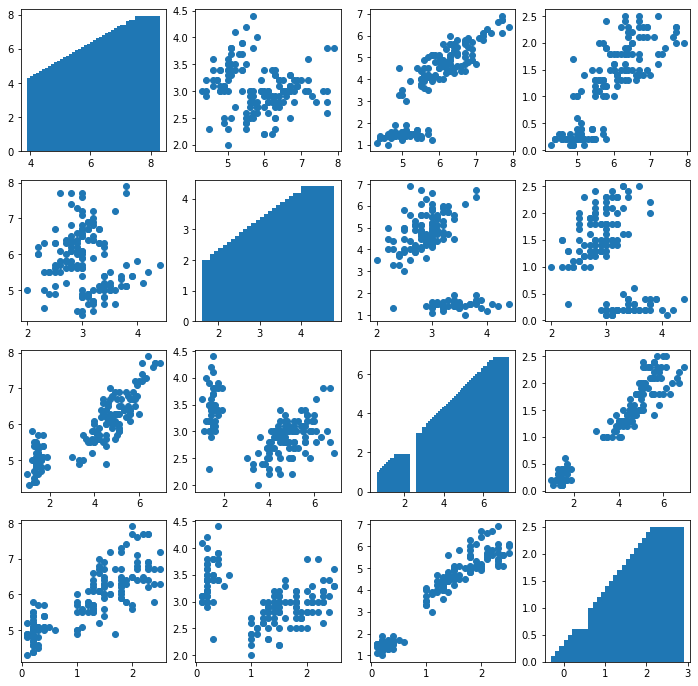

In [80]:
fig, axs = plt.subplots(4,4,figsize=(12,12))
for i in range(0,4):
    for j in range(0,4):
        if(i == j):
            axs[i,j].bar(df.iloc[:,i], df.iloc[:, j])
        else:
            axs[i,j].scatter(df.iloc[:,i], df.iloc[:, j])

In [83]:
y = df['class']
x = df.drop('class', axis=1)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)